In [26]:
# import the necessary packages

from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
import win32api as wp
import os
import re
import cv2 as cv2

from matplotlib import pyplot as plt
from matplotlib import image
import matplotlib.patches as mpatches

import argparse
import imutils
import glob
import random
import time

from skimage import data
from skimage import io
import skimage.data as data
import skimage.segmentation as seg
from skimage.segmentation import clear_border
import skimage.filters as filters
from skimage.filters import threshold_otsu
import skimage.draw as draw
import skimage.color as color
from skimage.color import label2rgb
from skimage.measure import label, regionprops
from skimage.morphology import closing, square

In [2]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [3]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)


Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [4]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


In [5]:
# day 1 - 06/01/20

path = wp.GetShortPathName("C:/Users/marce/Documents" \
                           "/interpromo_2020/AllData/SEATGURU_INFO_AIRCRAFT.csv")

In [18]:
data = pd.read_csv(path)
df = pd.DataFrame.from_csv(path, encoding='utf-8', sep=";")
dfetud = df[6000:7000]

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [5]:
dfetud['Aircraft_Type'] = (dfetud['Aircraft_Type'].str.replace(r' ', '_'))

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
dfetud['nom'] = dfetud['Airline_name'].str.cat(dfetud['Aircraft_Type'],sep="_")

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
list__type = dfetud['nom'].unique()

In [6]:
listeall=os.listdir("C:/Users/marce/Documents/interpromo_2020" \
                    "/AllData/ANALYSE IMAGE/LAYOUT SEATGURU")

In [31]:
# list comparator

results = []
for x in list__type :
    pattern = re.compile("x")
for texte in listeall :
     if pattern.search(texte) :
        results.append(texte)
results = list(set(results))

['AeroMexico_Boeing_737-700_V2_plane21.jpg',
 'Hainan_Airlines_Boeing_737_Max_8_plane473.svg.png',
 'Sunwing_Airlines_Boeing_737_Max_8_plane877.svg.png',
 'AeroMexico_Boeing_737-800_B_plane22.svg.png',
 'AeroMexico_Embraer_ERJ-170_plane24.jpg',
 'Norwegian_Air_Shuttle_Boeing_737_Max_8_plane678.svg.png',
 'Southwest_Airlines_Boeing_737_Max_8_plane851.svg.png',
 'WestJet_Boeing_737_Max_8_plane334.svg.png',
 'Qatar_Airways_Airbus_A321_182pax_plane747.svg.png',
 'Icelandair_Boeing_737_Max_8_plane505.svg.png',
 'AeroMexico_Boeing_737-800_C_plane23.jpg',
 'AeroMexico_Boeing_787-9_plane19.jpg',
 'Iberia_Airbus_A320_Express_plane497.jpg',
 'American_Airlines_Boeing_737_Max_8_plane177.svg.png',
 'Regional_Express_SAAB_340B_plane749.jpg',
 'Air_India_Express_Boeing_737-800_V2_plane104.jpg',
 'AeroMexio_Boeing_787-8_plane18.jpg',
 'AeroMexico_Embraer_ERJ-190_plane25.jpg',
 'Qatar_Airways_Airbus_A321_196pax_plane748.svg.png',
 'Aeromexico_AM_Boeing_737_MAX_8_plane20.svg.png',
 'SilkAir_Boeing_737_

In [22]:
# pattern matching - jet 1

path_im = wp.GetShortPathName("C:/Users/marce/Documents/" \
                              "interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/" \
                              "Aeroflot_Russian_Airlines_Airbus_A321_V3_plane11.jpg")


img = cv2.imread(path_im, 0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  
plt.show()

error: (3, 'GetShortPathNameW', 'Le chemin d’accès spécifié est introuvable.')

In [3]:
# day 2 - 07/01/20

# simple seats recognition - jet 1

path_im = wp.GetShortPathName("C:/Users/marce/Documents/" \
                              "interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/" \
                              "Aeroflot_Russian_Airlines_Airbus_A321_V3_plane11.jpg")
path_t = wp.GetShortPathName("C:/Users/marce/Documents/" \
                             "ProjetInterpromo2020G8/images/templateTest.jpg")

img_rgb = cv2.imread(path_im,0)
# if image is in rgb, use those next lines :
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# cv2.imshow('first',img_rgb)
# cv2.waitKey(0)
# gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 

template = cv2.imread(path_im,0)
w, h = template.shape[::-1]
res=cv2.matchTemplate(img_rgb,template,cv2.TM_CCOEFF_NORMED)
sin_val, max_val, min_loc, max_loc=cv2.minMaxLoc(res)
top_left=max_loc
threshold = 0.6
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
# to add +50 pixels on the limits of the rectangle, use those next lines :
# bottom_right=(top_left[0]+50,top_left[1]+50)
# cv2.rectangle(res, top_left, bottom_right, (0,255,0),5)

cv2.imshow('object found',img_rgb)
cv2.waitKey(0)

# conclusion : template needs to be clipped.

error: (2, 'GetShortPathNameW', 'Le fichier spécifié est introuvable.')

In [8]:
# simple seats recognition - jet 2 

img_rgb = cv2.imread(path_im,0)
# to change rgb to gray image :
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# cv2.imshow('first',img_rgb)
# cv2.waitKey(0)

template = cv2.imread(path_t,0)
w, h = template.shape[::-1]
res=cv2.matchTemplate(img_rgb,template,cv2.TM_CCOEFF_NORMED)
sin_val, max_val, min_loc, max_loc=cv2.minMaxLoc(res)
top_left=max_loc
threshold = 0.6
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
# on augmente les limites du rectangle de reconnaissance de 50 pixels
# bottom_right=(top_left[0]+40,top_left[1]+40)
# cv2.rectangle(res, top_left, bottom_right, (0,255,0),5)

cv2.imshow('object found',img_rgb)
cv2.waitKey(0)

-1

In [ ]:
path_t = wp.GetShortPathName("C:/Users/marce/Documents/"\
                            "ProjetInterpromo2020G8/images/temp_restau.jpg")
 
# charge the template, convert in gray, detection of borders
template = cv2.imread(path_t)
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
cv2.imshow("Template", template)
cv2.waitKey(0)

In [2]:
# day 3 - 08/01/2020


# Use of OpenCV and Mask R-CNN 


# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
ap.add_argument("-m", "--mask-rcnn", required=True,
	help="base path to mask-rcnn directory")
ap.add_argument("-v", "--visualize", type=int, default=0,
	help="whether or not we are going to visualize each instance")
ap.add_argument("-c", "--confidence", type=float, default=0.5,
	help="minimum probability to filter weak detections")
ap.add_argument("-t", "--threshold", type=float, default=0.3,
	help="minimum threshold for pixel-wise mask segmentation")
args = vars(ap.parse_args())

# load the COCO class labels our Mask R-CNN was trained on 
labelsPath = os.path.sep.join([args["mask_rcnn"],
	"object_detection_classes_coco.txt"])
LABELS = open(labelsPath).read().strip().split("\n")

# /!\ no class labels for searched objects, this method can't work here.
 
# load the set of colors that will be used when visualizing a given
# instance segmentation
colorsPath = os.path.sep.join([args["mask_rcnn"], "colors.txt"])
COLORS = open(colorsPath).read().strip().split("\n")
COLORS = [np.array(c.split(",")).astype("int") for c in COLORS]
COLORS = np.array(COLORS, dtype="uint8")

# error : an exception has occurred, use %tb to see the full traceback
# see https://www.pyimagesearch.com/2018/11/19/mask-r-cnn-with-opencv/
# the error is an aknowledged bug of OpenCV 

usage: ipykernel_launcher.py [-h] -i IMAGE -m MASK_RCNN [-v VISUALIZE]
                             [-c CONFIDENCE] [-t THRESHOLD]
ipykernel_launcher.py: error: the following arguments are required: -i/--image, -m/--mask-rcnn


SystemExit: 2

C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [27]:
# Use of OpenCV et Image Segmentation with Watershed Algorithm 

path_im = wp.GetShortPathName("C:/Users/marce/Documents/" \
                              "interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/" \
                              "Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg")

# from rgb to gray function 
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = cv2.imread(path_im)
# cv.IMREAD_grayscale
# gray = cv.cvtColor(imgcopy,cv.COLOR_BGR2GRAY)
gray = rgb2gray(img)
gray = gray.reshape((gray.shape,1))
print(gray.shape)
# imgcopy = img.apply(lambda x : np.uint32(x))  
imgcopy=np.uint32(gray)
# ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
cv2.imshow("Image", thresh) 
cv2.waitKey(0) 

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)  

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
cv2.imshow("Image", markers) 
cv2.waitKey(0)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]


# problems occured to convert from CV_U16S to CV_32S on the Marker labelling part
# too much problems with OpenCV for image segmentation

TypeError: 'tuple' object cannot be interpreted as an integer

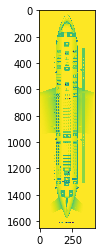

In [22]:
# use of scikit-image for image segmentation 
# the latest version of numpy is incompatible with the current scikit-image version.
# incompatibility with numpy 1.16.0 => use an inferior version
# it works with numpy version 1.15.0.

image_load = plt.imread("C:/Users/marce/Documents/interpromo_2020/"\
                        "AllData/ANALYSE IMAGE/LAYOUT SEATGURU/"\
                        "Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg")

im = cv2.cvtColor(image_load, cv2.COLOR_BGR2GRAY)
plt.imshow(im)

TypeError: Image data cannot be converted to float

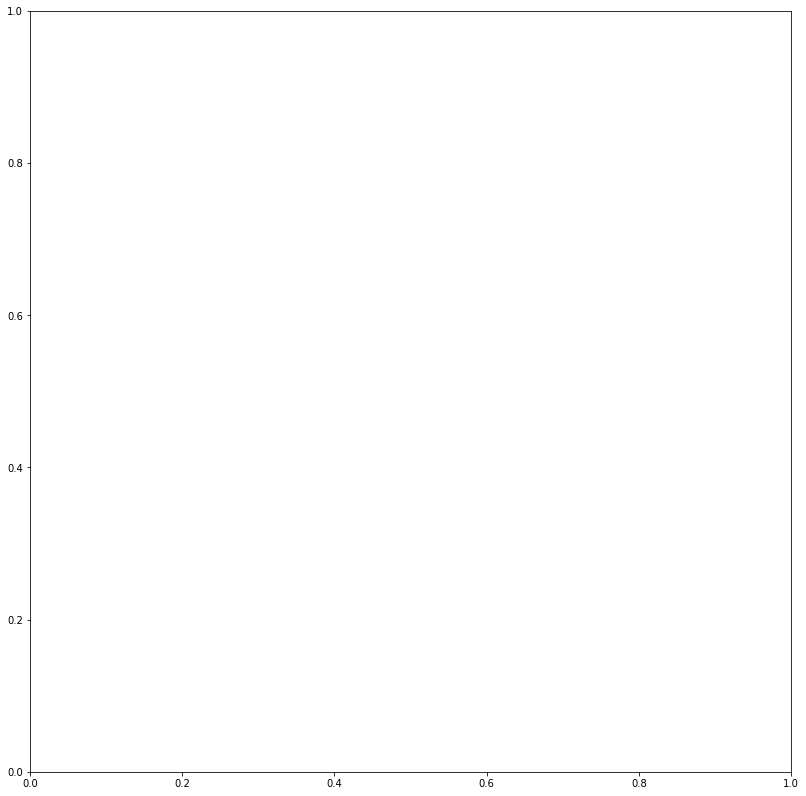

In [23]:
# histogram of the image
def image_show(im, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

image_show(im)

# histogram description
fig, ax = plt.subplots(1, 1)
ax.hist(image.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256)

In [12]:
# use of a method between otsu/li/local to segment the image
global imthe

# use of the li method
imthe = filters.threshold_li(im)
image_show(im < imthe)

NameError: name 'im' is not defined

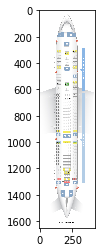

In [15]:
im2 = io.imread("C:/Users/marce/Documents/interpromo_2020/"\
                "AllData/ANALYSE IMAGE/LAYOUT SEATGURU/"\
                "Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg") 
plt.imshow(im2)

TypeError: Image data cannot be converted to float

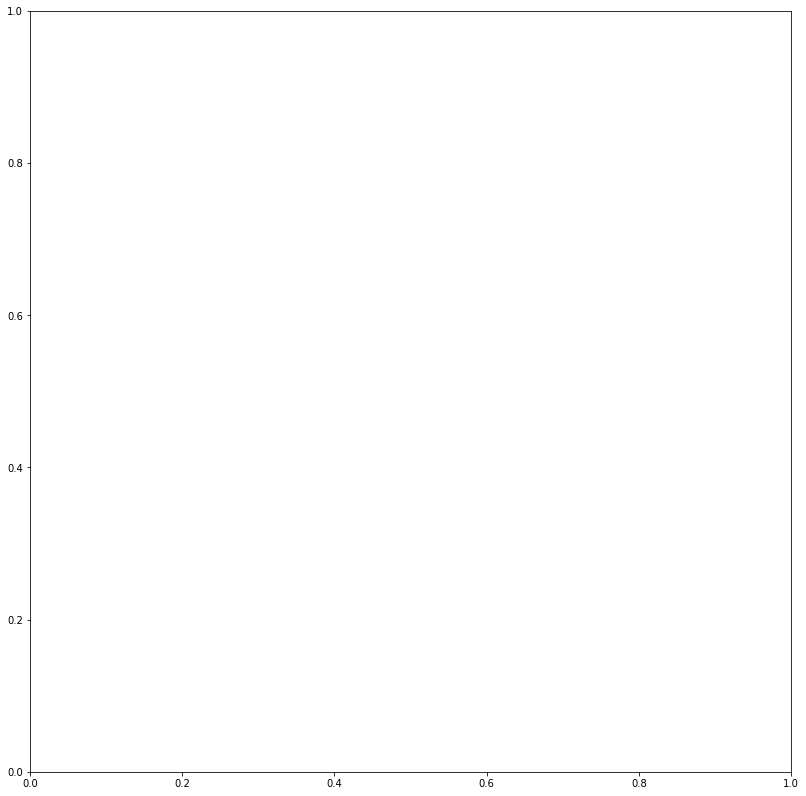

In [25]:
img = cv2.imread("C:/Users/marce/Documents/interpromo_2020/"\
                "AllData/ANALYSE IMAGE/LAYOUT SEATGURU/"\
                "Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg")


gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(300, [185, 165], 30)[:-1]

fig, ax = image_show(gray)
ax.plot(points[:, 0], points[:, 1], '--r', lw=2)

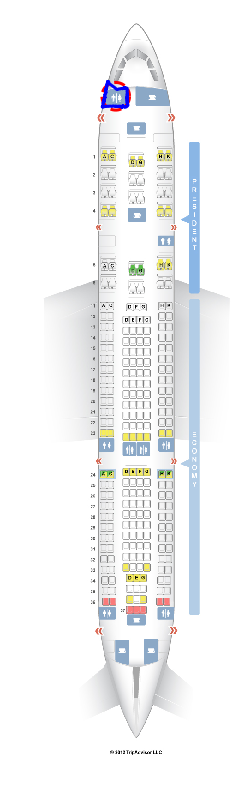

In [116]:
# use of snake method
snake = seg.active_contour(gray, points)
fig, ax = image_show(img)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

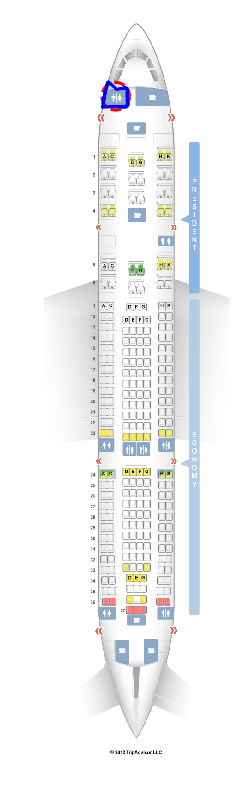

In [117]:
# smoothen the edges
snake = seg.active_contour(gray, points,alpha=0.06,beta=0.3)
fig, ax = image_show(img)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [108]:
image_labels = np.zeros(gray.shape, dtype=np.uint8)
image_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x251ca9d0470>)

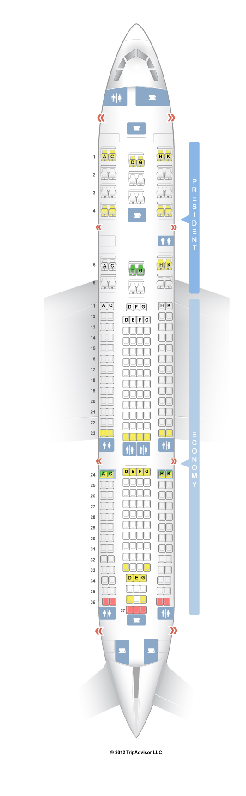

In [109]:
indices = draw.circle_perimeter(187, 165,20)
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2

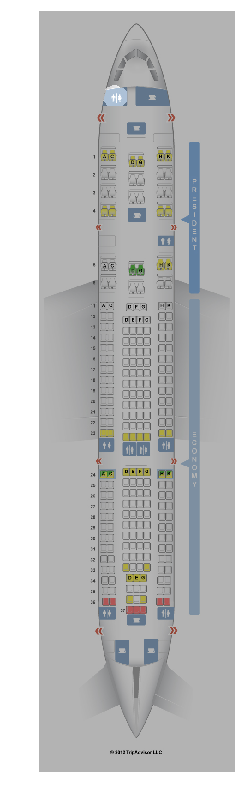

In [110]:
image_segmented = seg.random_walker(gray, image_labels)
fig, ax = image_show(gray)
ax.imshow(image_segmented == 1, alpha=0.3);

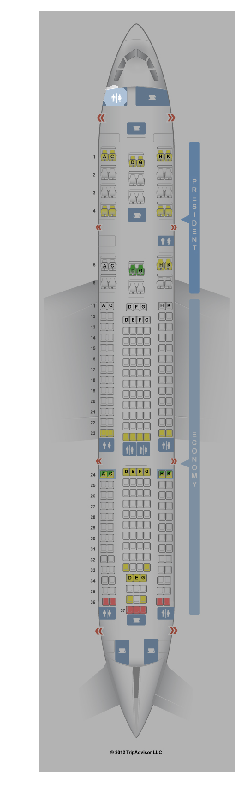

In [111]:
image_segmented = seg.random_walker(gray, image_labels, beta = 3000)
fig, ax = image_show(gray)
ax.imshow(image_segmented == 1, alpha=0.3);

# Reconnaissance de patterns ; Label image regions avec scikit-image et non pas OpenCV /!\ 

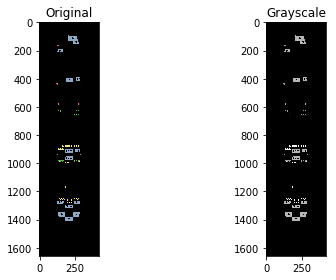

In [62]:
# segmentation with label image regions method / scikit-image



#on prend l'image sur laquelle on va appliquer la méthode:
image = plt.imread("C:/Users/marce/Documents/interpromo_2020/"\
                    "Alitalia_Airlines_Boeing_777-200_plane153.jpg")

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

original = image
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
fig.tight_layout()
plt.show()

In [64]:
# with the automatic OTSU method, use of a threshold

thresh = threshold_otsu(grayscale)
bw = closing(grayscale > thresh, square(3))

# threshold_otsu is expected to work correctly only for grayscale images

C:\Users\marce\Anaconda3\lib\site-packages\skimage\segmentation\_clear_border.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True
C:\Users\marce\Anaconda3\lib\site-packages\skimage\segmentation\_clear_border.py:60: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True


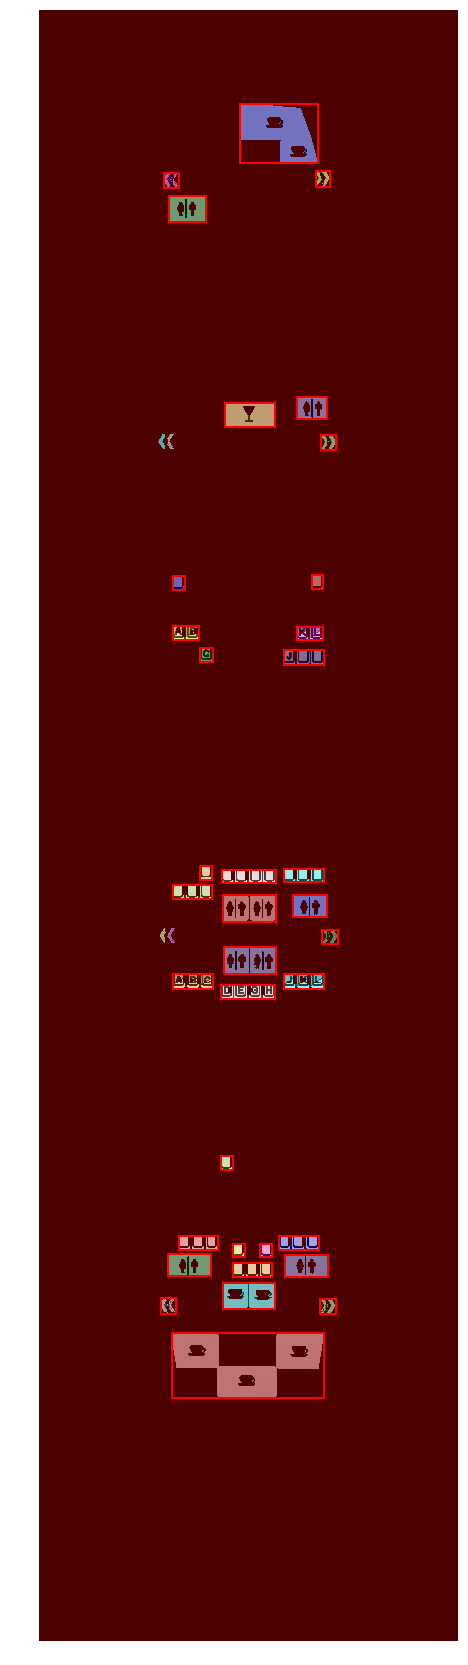

<Figure size 432x288 with 0 Axes>

In [65]:
# suppression of artifacts on the borders
cleared = clear_border(bw)

# area labeling 
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(80, 30))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # bigger enough area chosen
    if region.area >= 80:
        # draw rectangles around the defined areas
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.figure()
plt.tight_layout()
plt.show()

In [68]:
rect

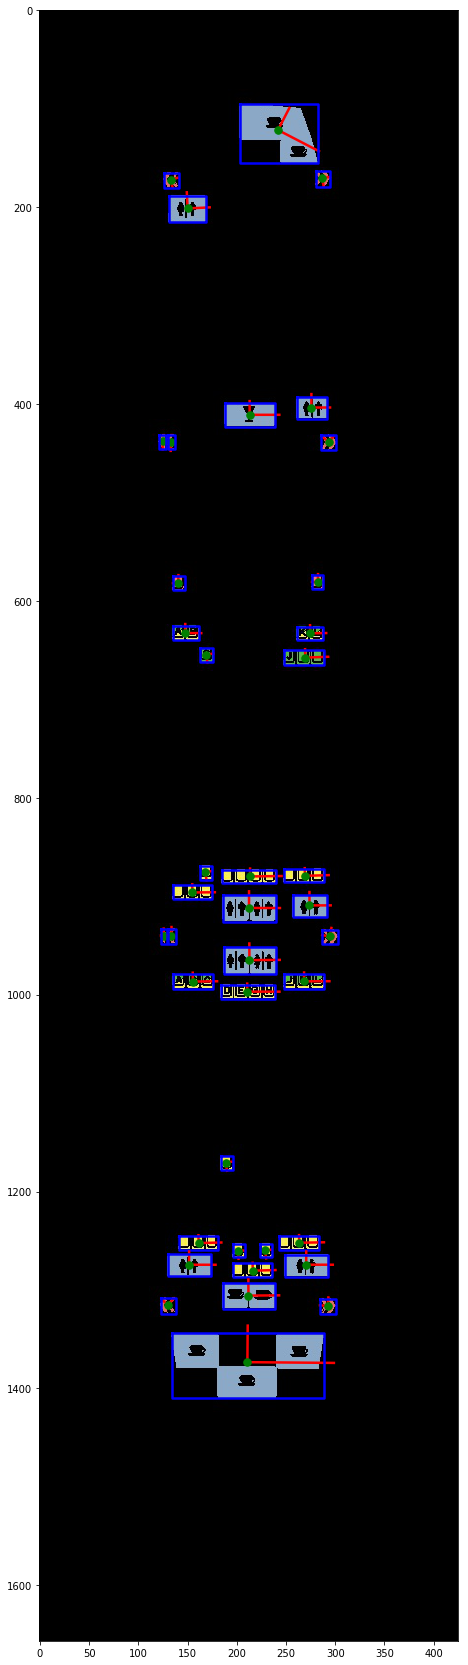

In [67]:
from skimage.measure import label, regionprops

fig, ax = plt.subplots(figsize=(80, 30))
ax.imshow(image, cmap=plt.cm.gray)


for props in regionprops(label_image):
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.major_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.major_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.minor_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

plt.show()

In [ ]:
images = [data.binary_blobs(volume_fraction=f) for f in fractions]

labeled_images = [measure.label(image) for image in images]

properties = ['label', 'area']

tables = [measure.regionprops_table(image, properties=properties)
          for image in labeled_images]
tables = [pd.DataFrame(table) for table in tables]

for fraction, table in zip(fractions, tables):
    table['volume fraction'] = fraction

areas = pd.concat(tables, axis=0)

# Create custom grid of subplots
grid = plt.GridSpec(2, 2)
ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1])
ax = plt.subplot(grid[1, :])
# Show image with lowest volume fraction
ax1.imshow(images[0], cmap='gray_r')
ax1.set_axis_off()
ax1.set_title(f'fraction {fractions[0]}')
# Show image with highest volume fraction
ax2.imshow(images[-1], cmap='gray_r')
ax2.set_axis_off()
ax2.set_title(f'fraction {fractions[-1]}')
# Plot area vs volume fraction
areas.plot(x='volume fraction', y='area', kind='scatter', ax=ax)
plt.show()